### Importing libraries

In [1]:
import pandas as pd
import re,sys,os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#matplotlib inline

### Changing working directory

In [2]:
os.chdir("D:/hackathon/novaritis_he/6a62a5b4967411ea/Dataset/")

In [3]:
trainf = pd.read_csv("Train.csv",parse_dates=['DATE'])
testf = pd.read_csv("Test.csv",parse_dates=['DATE'])
ss = pd.read_csv("sample_submission.csv")

In [4]:
trainf.shape,testf.shape,ss.shape

((23856, 18), (15903, 17), (7, 2))

In [5]:
trainf.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [6]:
trainf.columns[2:]

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE'],
      dtype='object')

In [7]:
trainf.dtypes

INCIDENT_ID                 object
DATE                datetime64[ns]
X_1                          int64
X_2                          int64
X_3                          int64
X_4                          int64
X_5                          int64
X_6                          int64
X_7                          int64
X_8                          int64
X_9                          int64
X_10                         int64
X_11                         int64
X_12                       float64
X_13                         int64
X_14                         int64
X_15                         int64
MULTIPLE_OFFENSE             int64
dtype: object

### Finding NA values

In [8]:
trainf.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

### it looks like the anonomous columns are categorical since max levels are 133 in X_11 and all other are less than that
### this does not look like numerical data

### Imputing numm value by mode

In [9]:
trainf['X_12'].fillna(trainf['X_12'].mode()[0], inplace=True)

In [11]:
testf.isnull().sum()
testf['X_12'].fillna(testf['X_12'].mode()[0], inplace=True)

In [12]:
for i in range(1,16):
    col = "X_" + str(i)
    print(col)
    print(len(trainf[col].unique()))

X_1
8
X_2
52
X_3
52
X_4
10
X_5
5
X_6
19
X_7
19
X_8
24
X_9
7
X_10
24
X_11
133
X_12
23
X_13
60
X_14
62
X_15
28


### Feature engineering

### Extracting features from date

In [13]:
trainf['day'] = trainf.DATE.apply(lambda x : x.day)
trainf['month'] = trainf.DATE.apply(lambda x : x.month)
trainf['year'] = trainf.DATE.apply(lambda x : x.year)
trainf['dayofweek'] = trainf.DATE.apply(lambda x : x.dayofweek)
trainf['hour'] = trainf.DATE.apply(lambda x : x.hour)

In [14]:
testf['day'] = testf.DATE.apply(lambda x : x.day)
testf['month'] = testf.DATE.apply(lambda x : x.month)
testf['year'] = testf.DATE.apply(lambda x : x.year)
testf['dayofweek'] = testf.DATE.apply(lambda x : x.dayofweek)
testf['hour'] = testf.DATE.apply(lambda x : x.hour)

In [15]:
trainf.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,day,month,year,dayofweek,hour
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,...,1.0,92,29,36,0,4,7,2004,6,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,...,1.0,103,142,34,1,18,7,2017,1,0
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,...,1.0,110,93,34,1,15,3,2017,2,0
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,...,1.0,72,29,34,1,13,2,2009,4,0
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,...,0.0,112,29,43,1,13,4,2005,2,0


In [78]:
trainf.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'day', 'month', 'year', 'dayofweek', 'hour'],
      dtype='object')

### Exploratory data Analysis

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


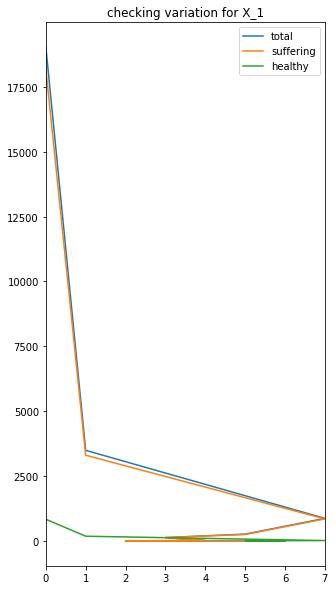

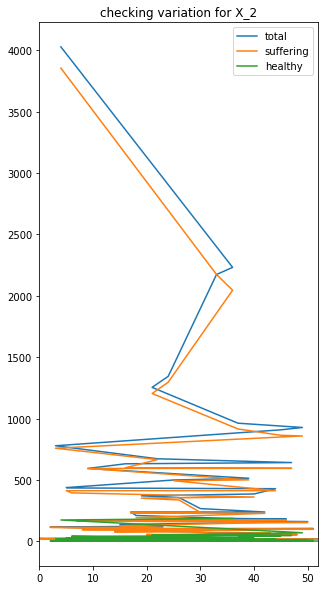

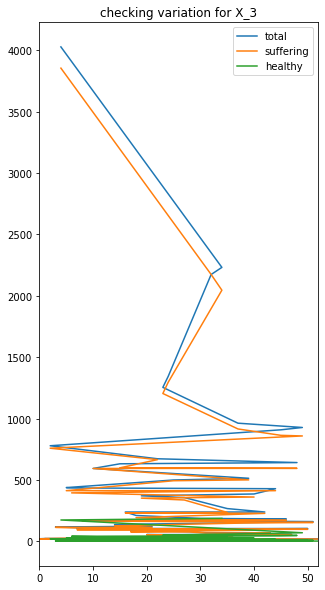

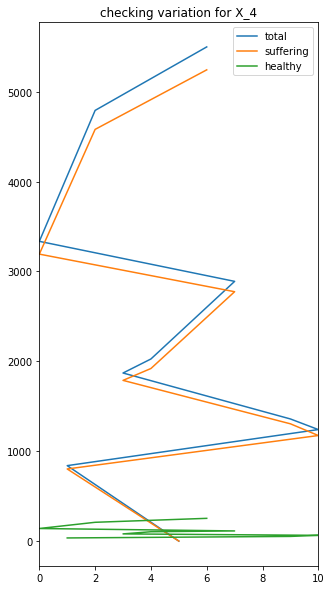

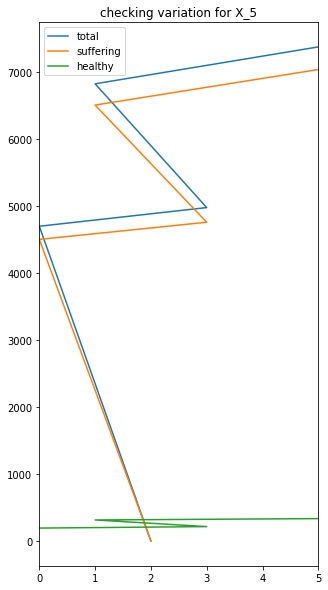

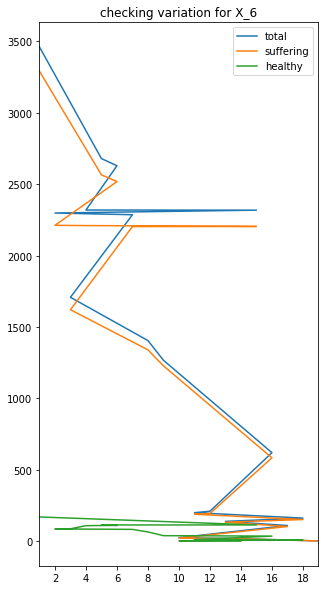

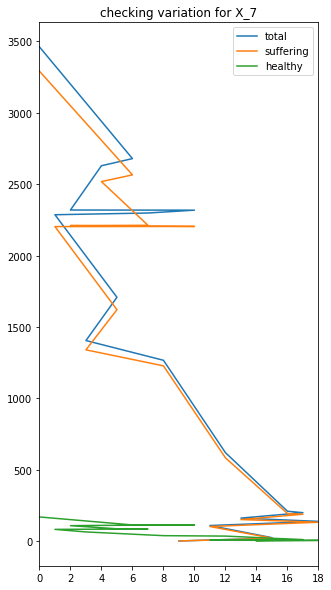

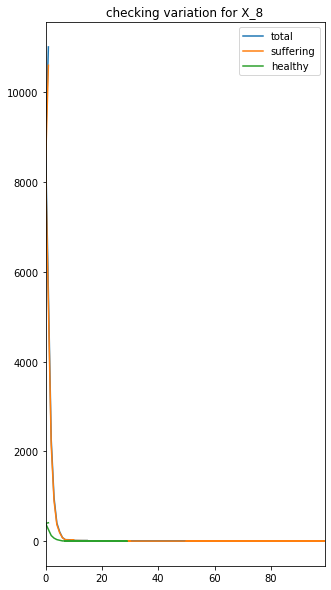

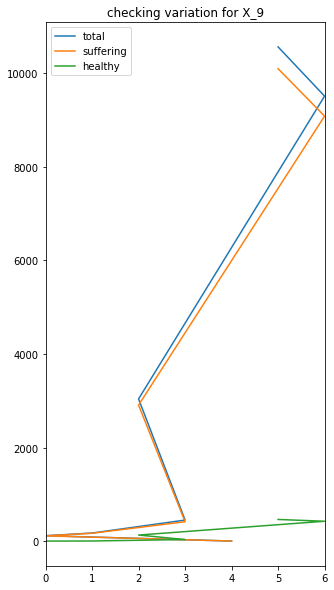

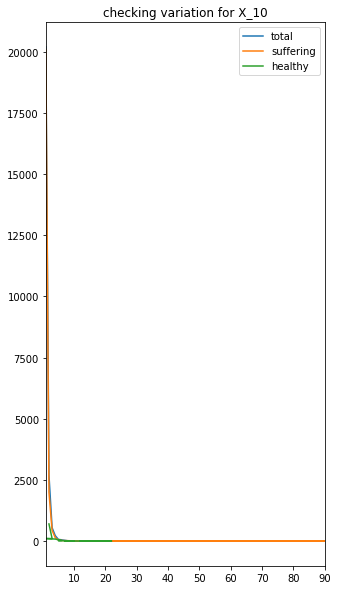

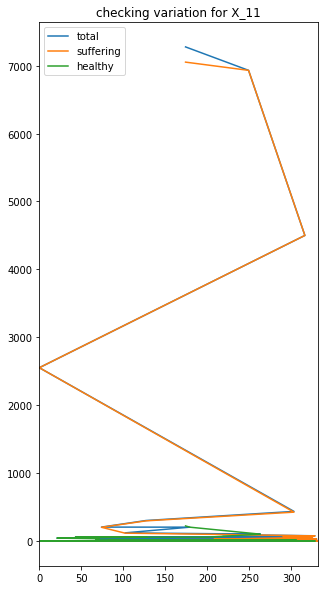

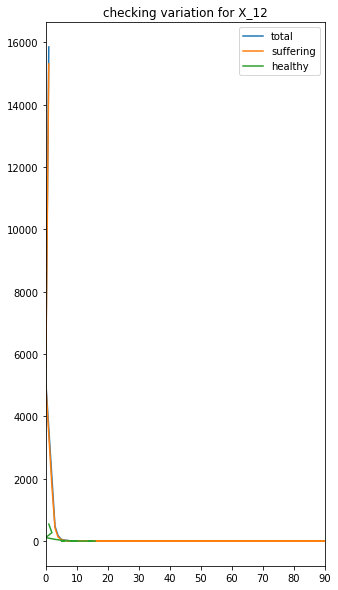

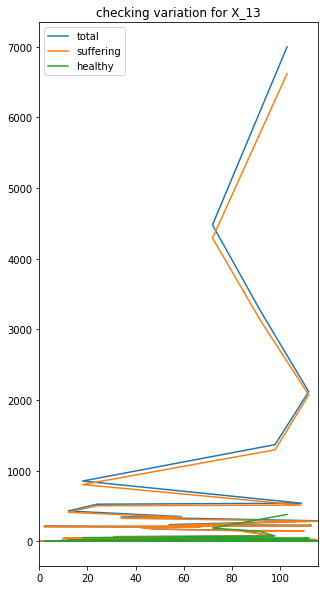

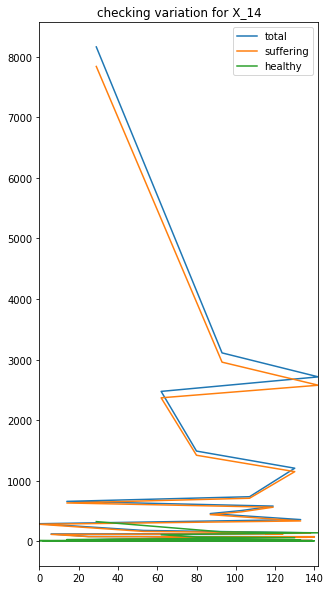

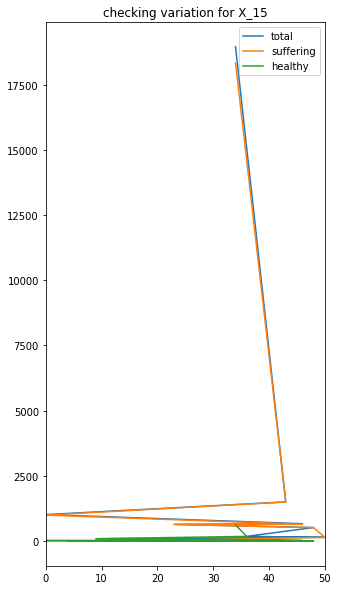

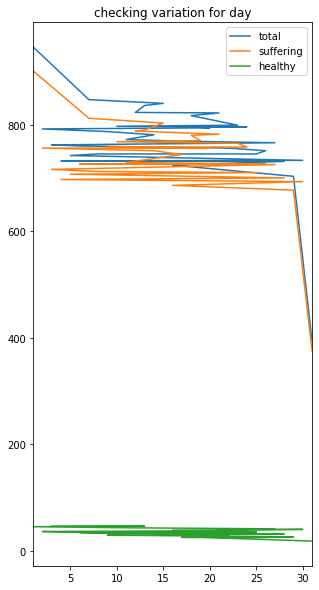

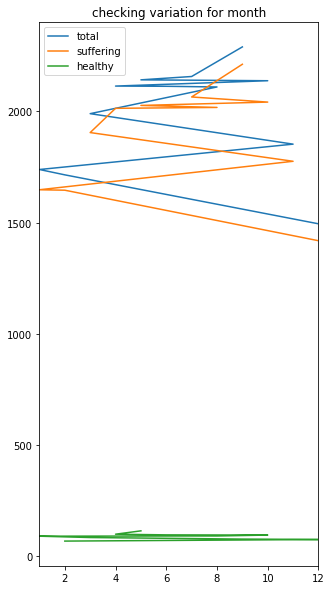

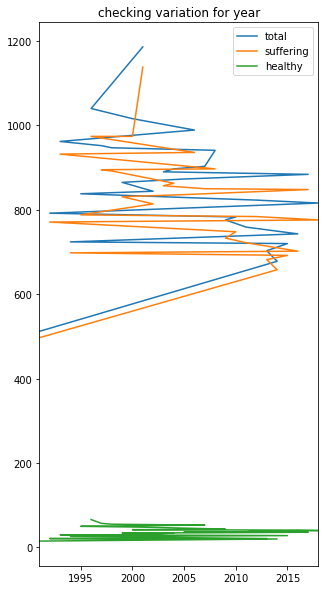

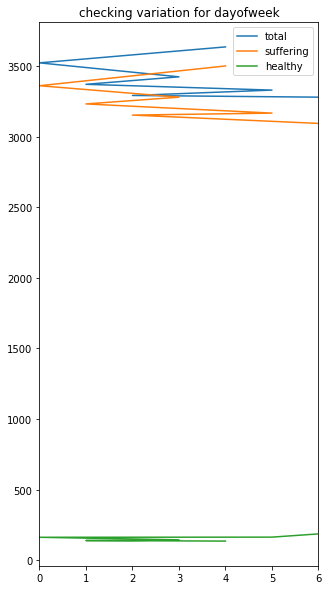

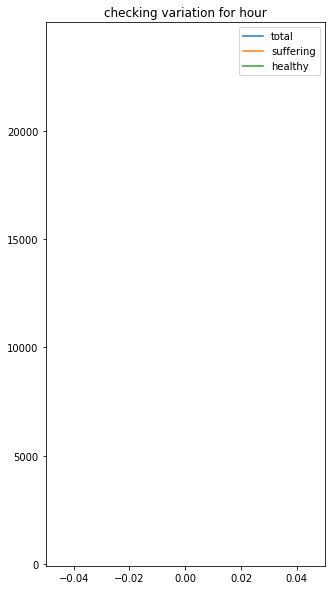

In [79]:
for c in ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15','day', 'month', 'year', 'dayofweek', 'hour']:
    
   
    
    suffering=trainf[trainf['MULTIPLE_OFFENSE'] == 1][c].value_counts()
    healthy=trainf[trainf['MULTIPLE_OFFENSE'] == 0][c].value_counts()
    total=trainf[c].value_counts()

    fig, axes = plt.subplots(nrows=1,ncols=1)
    #print("checking variation for {}".format(c))
    
    f1= total.plot(ax=axes,label='total')
    f1.title.set_text("checking variation for {}".format(c))
    
    f2=suffering.plot(ax=axes,label='suffering')
    #f2.title.set_text("checking variation for {}".format(c))
    
    f3=healthy.plot(ax=axes,label='healthy')
    #f3.title.set_text("checking variation for {}".format(c))

    axes.legend(loc='best')



#### There is quite a pattern in the anonymous variabels and dependent class

In [81]:

#### This is not needed since we are treating variabels as categorical
# from pylab import rcParams
# rcParams['figure.figsize'] = 5, 10
# plt.figure(figsize=(20,5))
# sns.pairplot(trainf[list(trainf.columns[2:])].head(1000),hue='MULTIPLE_OFFENSE',palette='Set1')

## catboost 

In [18]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from collections import Counter

In [20]:
import catboost
catboost.__version__

'0.16.5'

In [27]:
X_train, Y = trainf.drop(["INCIDENT_ID",'DATE','MULTIPLE_OFFENSE'], axis=1).values, trainf["MULTIPLE_OFFENSE"].values
X_test = testf.drop(["INCIDENT_ID",'DATE'], axis=1).values

X_train.shape, Y.shape, X_test.shape

((23856, 20), (23856,), (15903, 20))

In [25]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    model = CatBoostClassifier(random_state=27, max_depth=6, task_type="CPU", n_estimators=1000, verbose=500)
    model.fit(x_train, y_train, cat_features=[1, 2, 4, 5, 11])
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

Learning rate set to 0.038597
0:	learn: 0.5977316	total: 113ms	remaining: 1m 53s
500:	learn: 0.0032742	total: 24.3s	remaining: 24.2s
999:	learn: 0.0016932	total: 48.2s	remaining: 0us
0.999372024217745
Learning rate set to 0.038598
0:	learn: 0.5979691	total: 45.2ms	remaining: 45.2s
500:	learn: 0.0034158	total: 25.4s	remaining: 25.3s
999:	learn: 0.0017647	total: 50.1s	remaining: 0us
0.9985239172915771
Learning rate set to 0.038598
0:	learn: 0.5982342	total: 49ms	remaining: 48.9s
500:	learn: 0.0026297	total: 26.1s	remaining: 26s
999:	learn: 0.0012401	total: 51.6s	remaining: 0us
0.9993704271304892
Learning rate set to 0.038598
0:	learn: 0.5963794	total: 47.3ms	remaining: 47.2s
500:	learn: 0.0031363	total: 27.1s	remaining: 27s
999:	learn: 0.0015080	total: 52.6s	remaining: 0us
0.9987424020121568
Learning rate set to 0.038598
0:	learn: 0.5971689	total: 48.5ms	remaining: 48.5s
500:	learn: 0.0029266	total: 26.5s	remaining: 26.4s
999:	learn: 0.0015114	total: 52.3s	remaining: 0us
0.99915986307067

In [28]:
model = CatBoostClassifier(random_state=27, task_type="CPU", n_estimators=1000, max_depth=6, verbose=500)
model.fit(X_train, Y, cat_features=[1, 2, 4, 5, 11])
preds1 = model.predict_proba(X_test)

Learning rate set to 0.041113
0:	learn: 0.5950714	total: 45.2ms	remaining: 45.2s
500:	learn: 0.0025722	total: 24.3s	remaining: 24.2s
999:	learn: 0.0012914	total: 51.1s	remaining: 0us


### Feature importance

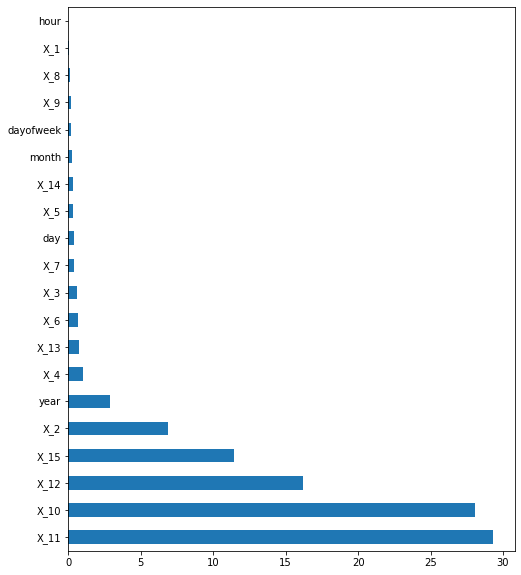

In [29]:
feat_imp = pd.Series(model.feature_importances_, 
                     index=trainf.drop(["INCIDENT_ID",'DATE','MULTIPLE_OFFENSE'], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

### X_11 is capturing maximum variance
### * Date is not that important but year is

### XGboost

In [61]:
X_train, Y = trainf.drop(["INCIDENT_ID",'DATE','MULTIPLE_OFFENSE','X_11'], axis=1).values, trainf["MULTIPLE_OFFENSE"].values
X_test = testf.drop(["INCIDENT_ID",'DATE','X_11','MULTIPLE_OFFENSE'], axis=1).values

X_train.shape, Y.shape, X_test.shape

((23856, 19), (23856,), (15903, 19))

In [62]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
#     num_class1, num_class2, num_class3 = Counter(y_train)[1], Counter(y_train)[2], Counter(y_train)[3]
#     sm = SMOTE(random_state=27, sampling_strategy={1: int(2.0*num_class1), 2: int(1.6*num_class2), 3: int(1.6*num_class3)})
#     x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)
    model.fit(x_train, y_train, categorical_feature=[1, 2, 4, 5, 11])
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


0.9836324514563392


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


0.9817004628976469


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


0.9826508206452649


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


0.98373243332602


C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


0.9788298199276745
Average:  0.982109197650589


In [63]:

model = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)
model.fit(X_train, Y, categorical_feature=[1, 2, 4, 5, 11])
preds2 = model.predict_proba(X_test)

C:\Users\RathoreA\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


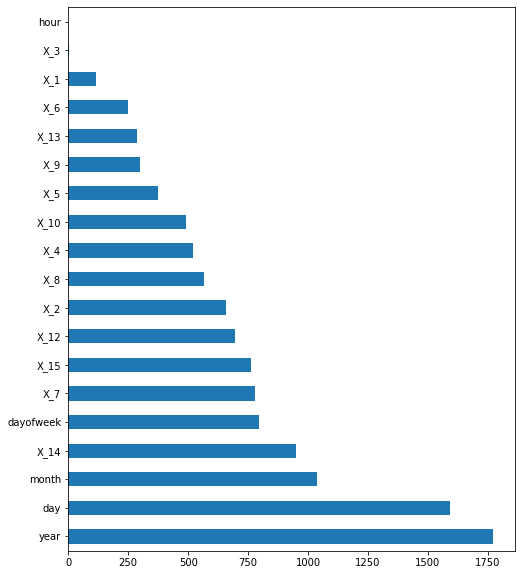

In [65]:
feat_imp = pd.Series(model.feature_importances_, 
                     index=trainf.drop(["INCIDENT_ID",'DATE','MULTIPLE_OFFENSE','X_11'], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [30]:
trainf['MULTIPLE_OFFENSE'].unique()

array([0, 1], dtype=int64)

In [33]:
trainf['X_11'].unique()

array([174, 236, 249, 303, 316, 145,   0, 127, 299, 158,  12,  74, 328,
        60, 263, 162, 231, 179, 225, 330, 218, 102,  21, 325, 313, 277,
       192, 200,  43, 285, 114, 245, 128, 323, 329, 132, 208,  71, 290,
       321,  82, 111,  20, 198, 256, 319, 222,  73, 244, 169,  39, 150,
        68, 274, 292, 182, 243, 306, 205,  67, 204, 223, 268, 310, 120,
       264, 295,  84, 159, 327, 135,  32,  98, 229, 184,  58, 260, 106,
        11,  53, 164,  97, 297, 332, 206, 261,  79, 175,  50,  33, 207,
       270,  16, 320, 104,  76,  69, 248, 254, 185, 220,   1, 294,  55,
       161, 137, 209, 210, 291,  25, 183, 255,  75, 241, 126, 232, 160,
       196, 322, 300,  31, 273,  56,   6, 189, 314, 234, 266,  34,  47,
       287, 103, 168], dtype=int64)

In [70]:
suffering.keys()

Int64Index([174, 249, 316,   0, 303, 127,  74, 102, 218, 328, 290, 313, 325,
            277, 231, 299, 208, 330, 285, 162, 329, 236, 244, 169, 323, 321,
            310, 243, 270, 223, 225, 292, 332, 295, 297, 241, 126, 322, 327,
            248],
           dtype='int64')

In [71]:
healthy.keys()

Int64Index([174, 179, 263, 200,  43, 128,  21,  71,  67, 306,
            ...
            103, 220,  97,  84, 223, 229,  76, 232, 234, 160],
           dtype='int64', length=101)

In [75]:
len([g for g in list(healthy.keys()) if g not in list(suffering.keys()) ]),len(list(healthy.keys()))

(93, 101)

In [76]:
len([g for g in list(suffering.keys()) if g not in list(healthy.keys()) ]),len(list(suffering.keys()))

(32, 40)

## this is quite weird that presence of a distinct X_11 is classifying the multiple offense 

## It looks like there is a clear pattern in data or a direct relationship between anonymous variabels and dependent variable

### I have tried removing X_11 but still result is similar and model is getting amost 98% f1 socre on kfold


It means that the independent variables are capturing almost 100 % variance and model is amost perfect. This might be due to A) Data is created in such a way B) Some of the variables which are anonomous are taken as post effect, i.e. after the attach flag was attached to the data

### Peparing for Submission

In [39]:
preds2.shape

(15903, 2)

In [46]:
preds2.argmax(axis=1)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
testf['MULTIPLE_OFFENSE'] = preds2.argmax(axis=1)

In [48]:
testf['MULTIPLE_OFFENSE'].unique()

array([1, 0], dtype=int64)

In [52]:
testf[list(ss.columns)].to_csv('sub1.csv',index=None)